<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

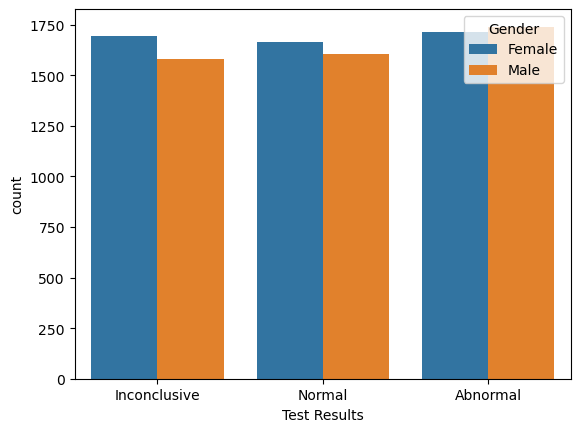

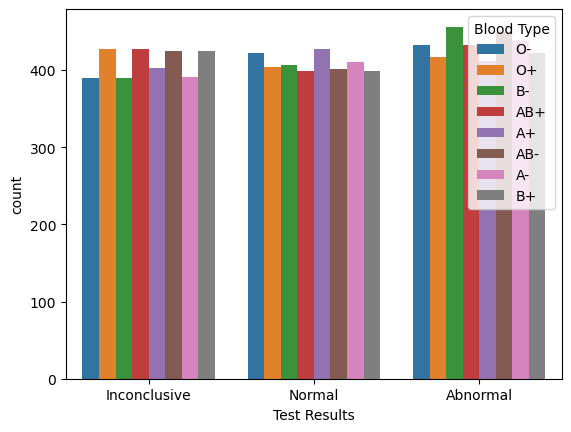

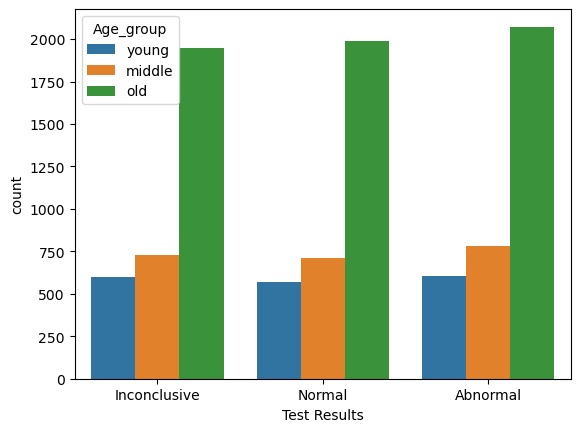

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              10000 non-null  object  
 1   Blood Type          10000 non-null  object  
 2   Medical Condition   10000 non-null  object  
 3   Date of Admission   10000 non-null  object  
 4   Doctor              10000 non-null  object  
 5   Hospital            10000 non-null  object  
 6   Insurance Provider  10000 non-null  object  
 7   Billing Amount      10000 non-null  float64 
 8   Admission Type      10000 non-null  object  
 9   Discharge Date      10000 non-null  object  
 10  Medication          10000 non-null  object  
 11  Test Results        10000 non-null  object  
 12  Age_group           10000 non-null  category
dtypes: category(1), float64(1), object(11)
memory usage: 947.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999

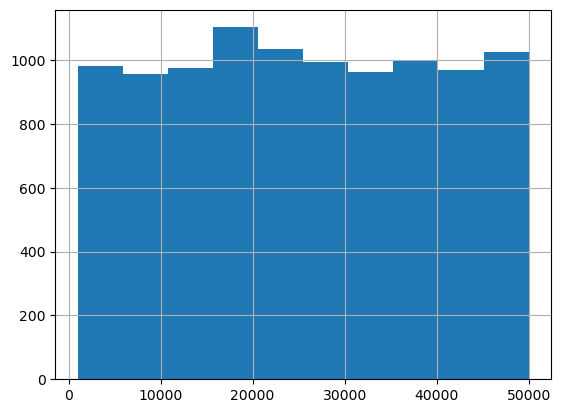

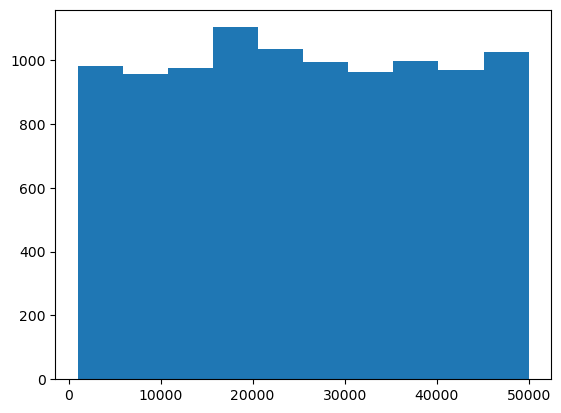

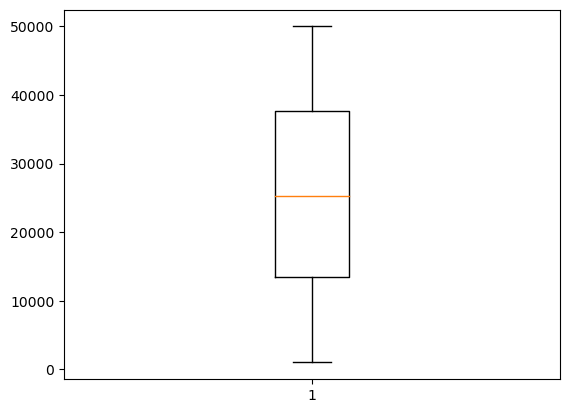

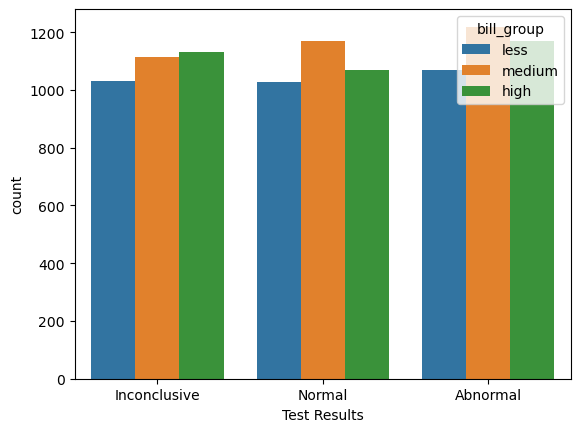

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              10000 non-null  object  
 1   Blood Type          10000 non-null  object  
 2   Medical Condition   10000 non-null  object  
 3   Doctor              10000 non-null  object  
 4   Hospital            10000 non-null  object  
 5   Insurance Provider  10000 non-null  object  
 6   Admission Type      10000 non-null  object  
 7   Medication          10000 non-null  object  
 8   Test Results        10000 non-null  object  
 9   Age_group           10000 non-null  category
 10  days in Hospital    10000 non-null  int64   
 11  bill_group          10000 non-null  category
dtypes: category(2), int64(1), object(9)
memory usage: 801.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
%run Datadrift.ipynb

In [2]:
dt = DecisionTreeClassifier(random_state=20)

In [3]:
dt_model = dt.fit(x_train,y_train)

In [4]:
y_test_pred = dt_model.predict(x_test)
y_train_pred = dt_model.predict(x_train)
y_test_prob_1 = dt_model.predict_proba(x_test)[:,1]

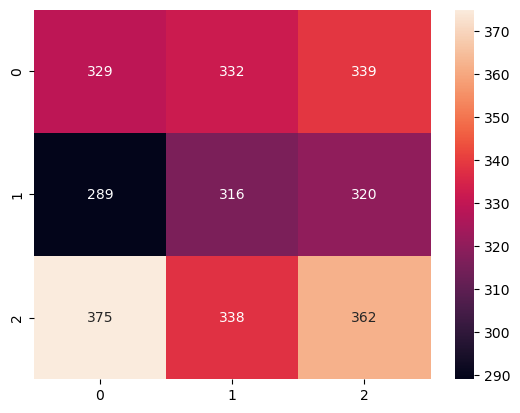

In [5]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [6]:
print(classification_report(y_test.astype(float),y_test_pred))

              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33      1000
         1.0       0.32      0.34      0.33       925
         2.0       0.35      0.34      0.35      1075

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



In [7]:
print(classification_report(y_train.astype(float),y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2277
         1.0       1.00      1.00      1.00      2342
         2.0       1.00      1.00      1.00      2381

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [8]:
dt_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",dt_accuracy_score)

Train accuracy =  0.9985714285714286


In [9]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(dt,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.32250567 0.33485494 0.33836907 0.3315936  0.32092826]
Bias error: 0.6703496904137054
Variance error: 0.020752520892914832


In [10]:
params = {'criterion':['entropy', 'gini'],'max_depth':np.arange(2,15),
          'min_samples_split':np.arange(2,10)}
dt = GridSearchCV(dt,param_grid=params,cv=5,scoring='recall')
dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='recall')

In [11]:
best = dt.best_params_
best

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

In [12]:
best = {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 6}

In [13]:
dt = DecisionTreeClassifier(**best)

In [14]:
dt_model = dt.fit(x_train,y_train)
y_test_pred = dt_model.predict(x_test)
y_train_pred = dt_model.predict(x_train)

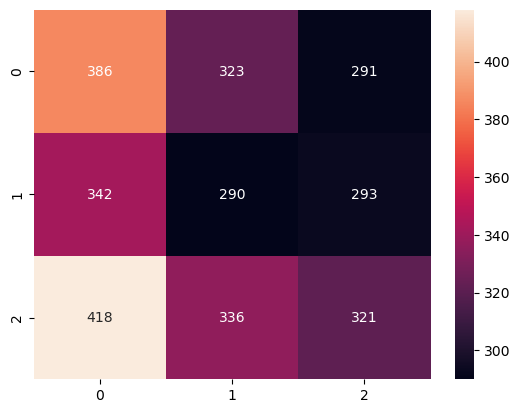

In [15]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [16]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.34      0.39      0.36      1000
           1       0.31      0.31      0.31       925
           2       0.35      0.30      0.32      1075

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



In [17]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80      2277
           1       0.81      0.80      0.81      2342
           2       0.85      0.75      0.80      2381

    accuracy                           0.80      7000
   macro avg       0.81      0.80      0.80      7000
weighted avg       0.81      0.80      0.80      7000



In [18]:
dt_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",dt_accuracy_score)

Train accuracy =  0.8034285714285714


In [19]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(dt,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.32844883 0.33739728 0.34059657 0.31481953 0.32849713]
Bias error: 0.6700481309126506
Variance error: 0.027179113235553026
